Задача 1. Застосувати різні методи масштабування і нормалізації даних. Проаналізувати результати

In [ ]:
#Задача 1. Масштабування даних
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Приклад даних: зріст (в сантиметрах) і вага (в кілограмах)
data = np.array([[150, 70], [160, 80], [170, 90], [180, 100]])

# Масштабування за допомогою MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(data)

# Масштабування за допомогою StandardScaler
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

# Масштабування за допомогою RobustScaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(data)

print("Оригінальні дані:")
print(data)
print("\nМасштабовані дані (MinMaxScaler):")
print(min_max_scaled_data)
print("\nМасштабовані дані (StandardScaler):")
print(standard_scaled_data)
print("\nМасштабовані дані (RobustScaler):")
print(robust_scaled_data)


Оригінальні дані:
[[150  70]
 [160  80]
 [170  90]
 [180 100]]

Масштабовані дані (MinMaxScaler):
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]

Масштабовані дані (StandardScaler):
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]

Масштабовані дані (RobustScaler):
[[-1.         -1.        ]
 [-0.33333333 -0.33333333]
 [ 0.33333333  0.33333333]
 [ 1.          1.        ]]


In [ ]:
from sklearn.preprocessing import normalize
normalize(data)

array([[0.90618314, 0.42288547],
       [0.89442719, 0.4472136 ],
       [0.88378792, 0.46788772],
       [0.87415728, 0.48564293]])

Завдання 2. Завантажити датасет heart.csv провести аналіз даних, побудувати моделі класифікації, вивести результати, зробити висновки.

Датасет
https://drive.google.com/file/d/1o3jIdtDyGpufREgFVv1u9fraVx2vDnUy/view?usp=drive_link


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Завантаження файлу
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv('heart.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


1. **age** – вік пацієнта (у роках).

2. **anaemia** – анемія (1 – є анемія, 0 – немає анемії).
Анемія знижує кількість червоних кров’яних клітин, що може впливати на кисневе забезпечення органів.

3. **creatinine_phosphokinase** – рівень ферменту креатинфосфокінази в крові (в міжнародних одиницях на літр, U/L).
Високі рівні можуть свідчити про пошкодження серцевого м’яза.

4. **diabetes** – наявність діабету (1 – є, 0 – немає).

5. **ejection_fraction** – фракція викиду (у відсотках, %).
Визначає, який відсоток крові викидається з серця при кожному скороченні. Нижчі значення вказують на серцеву недостатність.

6. **high_blood_pressure** – високий артеріальний тиск (1 – є, 0 – немає).

7. **platelets** – кількість тромбоцитів у крові (в кількості на мікролітр крові, e.g., kiloplatelets/mL).
Тромбоцити відіграють важливу роль у згортанні крові.

8. **serum_creatinine** – рівень креатиніну в сироватці крові (в міліграмах на децилітр, mg/dL).
Високий рівень може вказувати на порушення функції нирок.

9. **serum_sodium** – рівень натрію в сироватці крові (в мілімолях на літр, mEq/L).
Дисбаланс може бути пов’язаний із серцевою недостатністю.

10. **sex** – стать (1 – чоловік, 0 – жінка).

11. **smoking** – куріння (1 – курить, 0 – не курить).

12. **time** – час спостереження (у днях).
Наприклад, тривалість, протягом якої пацієнта спостерігали в рамках дослідження.

13. **DEATH_EVENT** – чи стався летальний випадок під час спостереження (1 – так, 0 – ні).
Це цільова змінна (target), яку часто використовують для прогнозування.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(3680)

In [ ]:
df = df.drop_duplicates()
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.30,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.00,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.90,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.00,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75.0,0,582,1,30,1,263358.03,1.83,134,1,0,23,1
4855,73.0,0,582,0,20,0,263358.03,1.83,134,1,1,198,1
4862,45.0,0,220,0,35,0,174000.00,0.80,139,1,1,121,0
4965,40.0,1,129,1,35,0,255000.00,0.90,137,1,0,209,0


In [ ]:
corr_matrix = df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


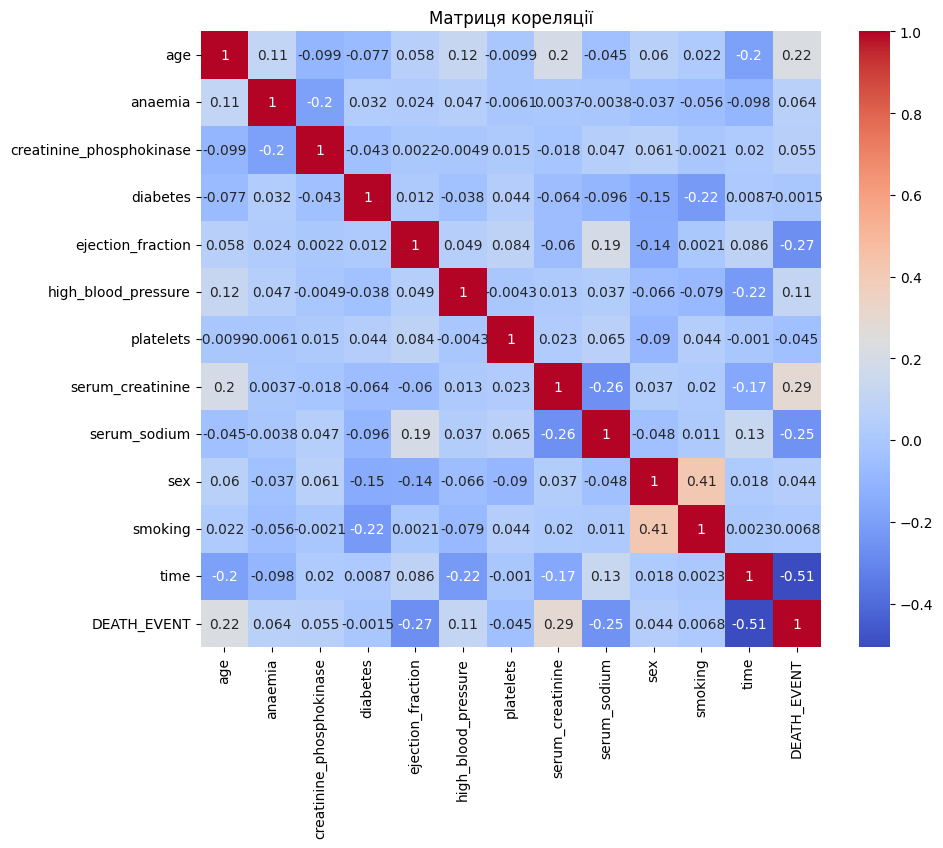

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Матриця кореляції")
plt.show()

In [ ]:
corr_matrix['DEATH_EVENT'].sort_values(ascending=False)

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.290229
age,0.224602
high_blood_pressure,0.113721
anaemia,0.063510
creatinine_phosphokinase,0.055221
sex,0.044045
smoking,0.006774
diabetes,-0.001485
platelets,-0.044523


Поділяємо дані на ознаки та цільову змінну

In [ ]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабуємо ознаки

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Будуємо модель RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Оцінка моделі Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.90      0.92        70

    accuracy                           0.96       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.96      0.96      0.96       264



Будуємо модель логістична регресія

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Оцінка моделі Логістичної регресії
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.8409090909090909
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       194
           1       0.70      0.70      0.70        70

    accuracy                           0.84       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.84      0.84      0.84       264



In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Оцінка моделі Град Бустінгу
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

Gradient Boosting Accuracy: 0.9431818181818182
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       194
           1       0.89      0.90      0.89        70

    accuracy                           0.94       264
   macro avg       0.93      0.93      0.93       264
weighted avg       0.94      0.94      0.94       264



Вивести прогнозовані і справжні результати для 10 пацієнтів.

In [ ]:
# Вивід справжніх та прогнозованих значень для 10 пацієнтів
results_df = pd.DataFrame({
    'True Values': y_test,
    'Predictions': rf_predictions
})

print("\nСправжні та прогнозовані значення для 10 пацієнтів:")
results_df.head(10)


Справжні та прогнозовані значення для 10 пацієнтів:


,True Values,Predictions
854,0,0
876,0,0
758,0,0
50,0,0
3460,0,0
596,0,0
679,1,1
1236,0,0
83,0,0
619,1,1


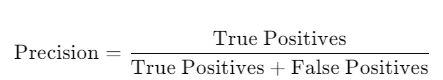

 Висока точність означає, що ваша модель рідко робить помилки, коли прогнозує позитивний клас.

Повнота. Високе значення означає, що модель вміє виявляти більшість позитивних випадків, але може допускати помилки у прогнозах негативних випадків.

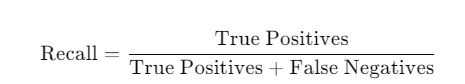

F1-Score — це гармонійне середнє між precision та recall. Воно забезпечує єдиний показник, який враховує як точність, так і повнота.Високий F1-Score вказує на те, що модель має хорошу продуктивність в обох аспектах.

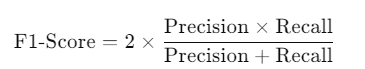

Застосування GridSearchCV для підбору параметрів

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

# 1. Grid Search для оптимізації гіперпараметрів
param_grid = {
    'n_estimators': [10, 50, 100, 200], #кількість дерев
    'max_depth': [None, 10, 20, 30], #максимальна глибина дерева
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] #мінімальна кількість зразків, що повинні бути в листі
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

# Оцінка моделі з найкращими параметрами
best_rf_model = grid_search.best_estimator_
grid_predictions = best_rf_model.predict(X_test)

# Оцінка точності
print("Grid Search Random Forest Accuracy:", accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Grid Search Random Forest Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.90      0.92        70

    accuracy                           0.96       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.96      0.96      0.96       264



In [ ]:
# 2. Randomized Search для оптимізації гіперпараметрів
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Найкращі параметри з Randomized Search
print("Best parameters from Randomized Search:", random_search.best_params_)

# Оцінка моделі з найкращими параметрами
best_rf_random_model = random_search.best_estimator_
random_predictions = best_rf_random_model.predict(X_test)

# Оцінка точності
print("Randomized Search Random Forest Accuracy:", accuracy_score(y_test, random_predictions))
print(classification_report(y_test, random_predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from Randomized Search: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 98}
Randomized Search Random Forest Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.90      0.92        70

    accuracy                           0.96       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.96      0.96      0.96       264

